Setup and Data Loading

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy import create_engine, inspect
import numpy as np


In [11]:
# Function to load data from SQLite database
def load_data_from_sqlite(db_name, table_name):
    db_path = f'../data/{db_name}.db'
    engine = create_engine(f'sqlite:///{db_path}')
    
    # List tables to ensure the table names are correct
    inspector = inspect(engine)
    available_tables = inspector.get_table_names()
    print("Available tables in the database:", available_tables)
    
    if table_name not in available_tables:
        raise ValueError(f"Table {table_name} not found in the database.")
    
    # Load data from the specified table
    df = pd.read_sql_table(table_name, con=engine)
    return df


try:
    air_quality_df = load_data_from_sqlite('AirQuality', 'data')
    print("Air Quality Data Loaded Successfully")
except Exception as e:
    print(f"Error loading air quality data: {e}")

try:
    inorganic_gases_df = load_data_from_sqlite('InorganicGases', 'InorganicGases_2017')
    print("Inorganic Gases Data Loaded Successfully")
except Exception as e:
    print(f"Error loading inorganic gases data: {e}")

# Continue with EDA if the data is loaded successfully
if 'air_quality_df' in locals():
    print("\nAir Quality Dataset:")
    print(air_quality_df.head())

if 'inorganic_gases_df' in locals():
    print("\nInorganic Gases Dataset:")
    print(inorganic_gases_df.head())


Available tables in the database: ['data', 'test']
Air Quality Data Loaded Successfully
Available tables in the database: ['InorganicGases_2017']
Inorganic Gases Data Loaded Successfully

Air Quality Dataset:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2018-07-02 -0.881489 -0.852443 -0.852833 -0.818300  -0.849975 -1.007510
1  2018-07-03 -0.804697 -0.840088 -0.850488 -0.880903  -0.909766 -1.248103
2  2018-07-05 -0.853635 -0.869360 -0.836027 -0.852482  -0.882621 -1.079315
3  2018-07-06 -0.850540 -0.830964 -0.818049 -0.803129  -0.835486 -1.023188
4  2018-07-09 -0.771621 -0.788195 -0.737930 -0.753009  -0.787615 -0.878482

Inorganic Gases Dataset:
                  DateTime        NO       NO2       NOx       SO2        O3  \
0  2017-01-01 00:00:00.000  0.259070  0.348016  0.419472  0.029600 -8.194955   
1  2017-01-01 00:10:00.000  0.238364  0.242131  0.335932  0.030158 -8.194955   
2  2017-01-01 00:20:00.000  0.302488  0.208156  0.365495  0.030308 -8.19495

Data Cleaning

In [34]:
# Check for and handle missing values
air_quality_df.dropna(inplace=True)
inorganic_gases_df.dropna(inplace=True)

# Ensure datetime columns are properly formatted
air_quality_df['Date'] = pd.to_datetime(air_quality_df['Date'])
inorganic_gases_df['DateTime'] = pd.to_datetime(inorganic_gases_df['DateTime'])

print("Data cleaning completed.")





Data cleaning completed.


Exploratory Data Analysis

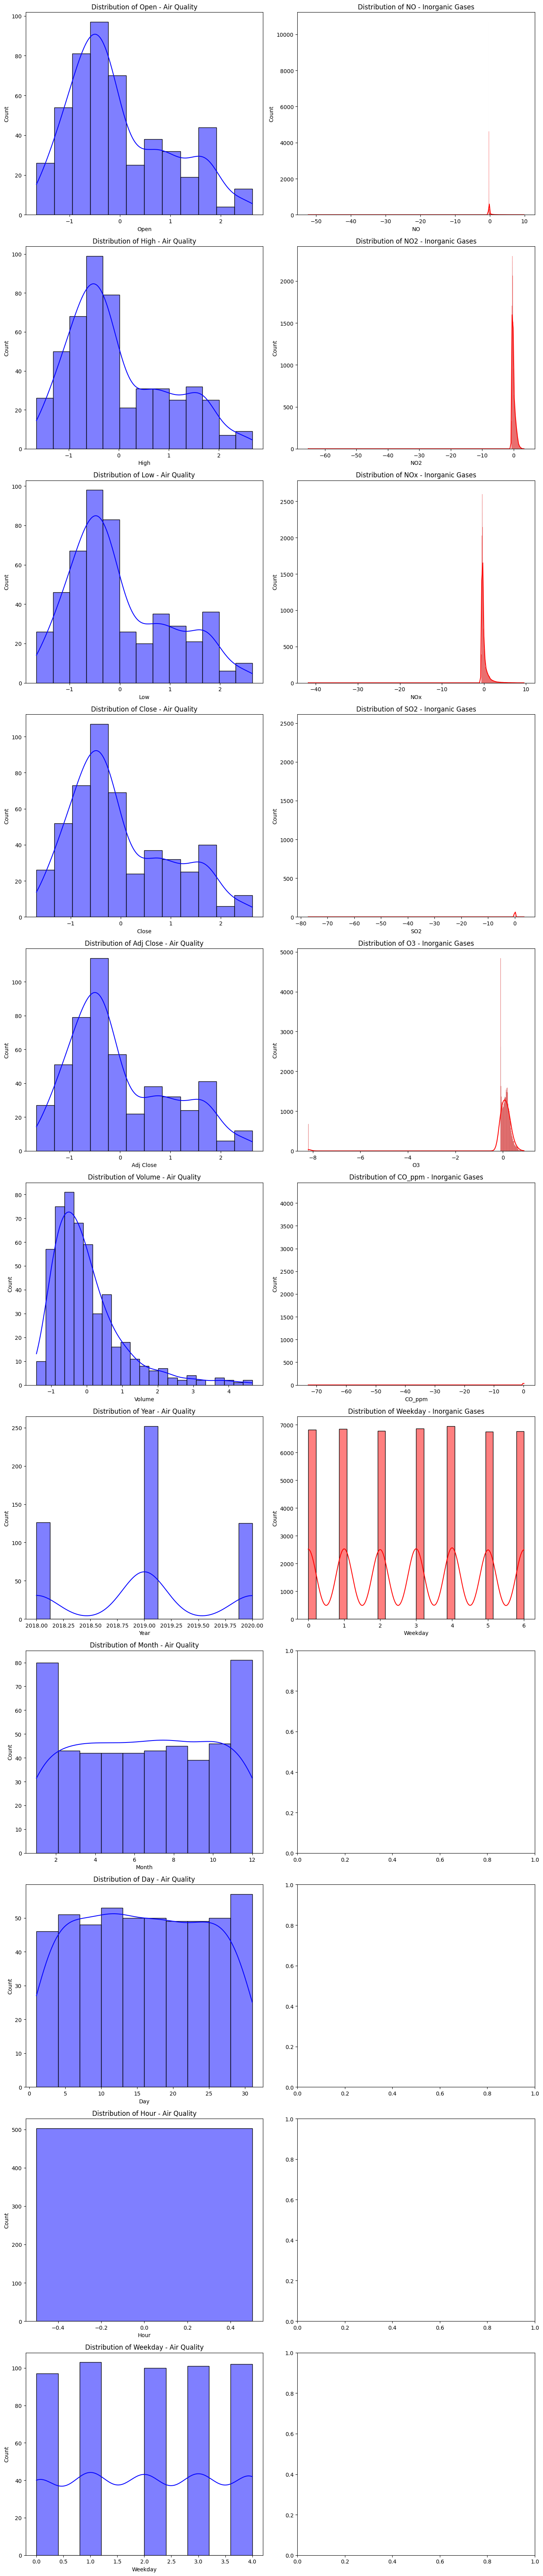

In [35]:
# Extract numerical data only for correlation analysis
numeric_cols_aq = air_quality_df.select_dtypes(include=[np.number]).columns
numeric_cols_ig = inorganic_gases_df.select_dtypes(include=[np.number]).columns

# Setting up the matplotlib figure
n_rows = len(numeric_cols_aq)
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 6 * n_rows))  

for idx, col in enumerate(numeric_cols_aq):
    sns.histplot(air_quality_df[col], kde=True, color='blue', ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col} - Air Quality')

for idx, col in enumerate(numeric_cols_ig):
    sns.histplot(inorganic_gases_df[col], kde=True, color='red', ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Distribution of {col} - Inorganic Gases')

plt.tight_layout()
plt.show()


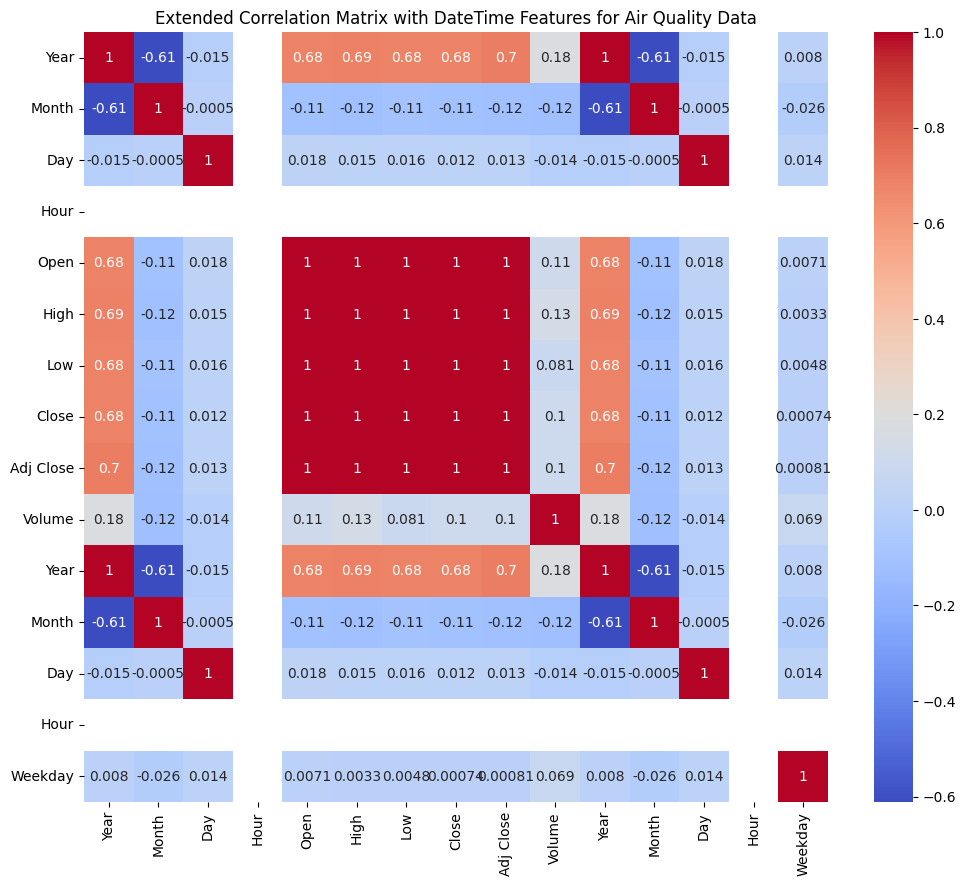

In [36]:
# Transforming DateTime data for further analysis
air_quality_df['Year'] = air_quality_df['DateTime'].dt.year
air_quality_df['Month'] = air_quality_df['DateTime'].dt.month
air_quality_df['Day'] = air_quality_df['DateTime'].dt.day
air_quality_df['Hour'] = air_quality_df['DateTime'].dt.hour

# Recheck the correlation including DateTime features
extended_numeric_cols = air_quality_df[['Year', 'Month', 'Day', 'Hour'] + list(numeric_cols_aq)].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(extended_numeric_cols, annot=True, cmap='coolwarm')
plt.title('Extended Correlation Matrix with DateTime Features for Air Quality Data')
plt.show()

# Feature engineering (optional)
# Example: Adding a 'Weekday' column
air_quality_df['Weekday'] = air_quality_df['DateTime'].dt.weekday
inorganic_gases_df['Weekday'] = inorganic_gases_df['DateTime'].dt.weekday



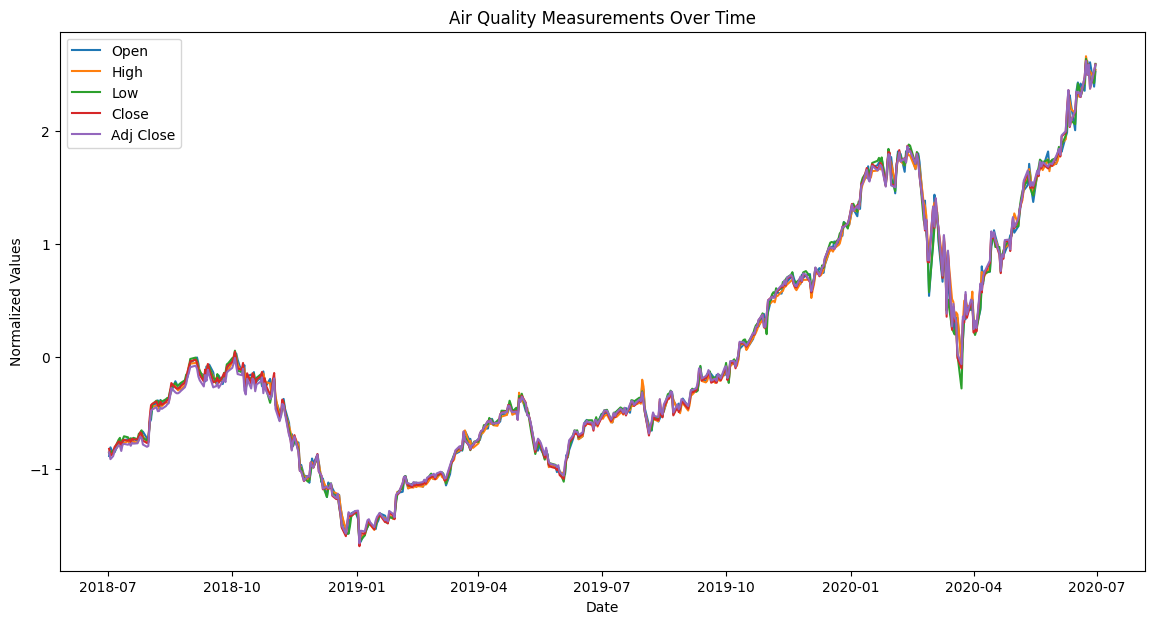

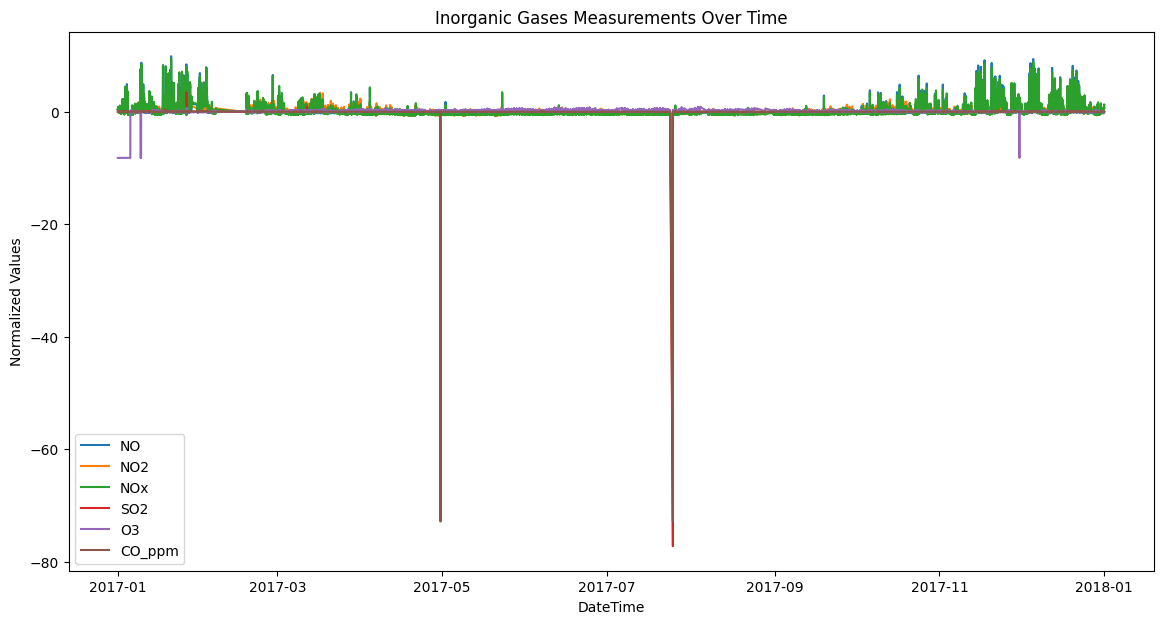

In [37]:
# Time Series Analysis
import matplotlib.pyplot as plt

# Plot trends for Air Quality data
plt.figure(figsize=(14, 7))
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    plt.plot(air_quality_df['Date'], air_quality_df[column], label=column)
plt.title('Air Quality Measurements Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

# Plot trends for Inorganic Gases data
plt.figure(figsize=(14, 7))
for column in ['NO', 'NO2', 'NOx', 'SO2', 'O3', 'CO_ppm']:
    plt.plot(inorganic_gases_df['DateTime'], inorganic_gases_df[column], label=column)
plt.title('Inorganic Gases Measurements Over Time')
plt.xlabel('DateTime')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

